# E-Commerce Fashion Business Analysis: Unveiling Sales, Customer Trends, and Product Insights

---

<pre>
<strong>Name</strong>     : Syamsul Rizal Fany
<strong>e-mail</strong>   : <a href="mailto:FanyRizalSyamsul@gmail.com">FanyRizalSyamsul@gmail.com</a>
<strong>LinkedIn</strong> : <a href="https://www.linkedin.com/in/syamsulrizalfany" target="_blank">My Profile</a>
<strong>GitHub</strong>   : <a href="https://github.com/Saemfany" target="_blank">GitHub Profile</a>
</pre>

---

## 1. Background

In the modern digital era, data plays a crucial role in driving business growth, especially for e-commerce companies. This project focuses on analyzing an online fashion business that produces and sells various fashion items through its online platform. Recognizing the importance of data, the company systematically stores its sales history, along with detailed information on products and customers, in a structured database.

The database consists of four key tables:
- **Customers**: Contains customer-related details such as customer ID, name, gender, age, home address, zip code, city, state, and country.
- **Orders**: Stores order information, including order ID, customer ID, order date, and delivery date.
- **Products**: Holds product details such as product ID, type, name, size, color, price, quantity, and description.
- **Sales**: Captures sales transactions with sales ID, order ID, product ID, price per unit, quantity, and total price.

By leveraging these datasets, this project aims to analyze sales performance, customer behavior, and product trends to derive valuable insights that can optimize business strategies, enhance customer satisfaction, and drive overall growth.

## 2. Data Wrangling

This data analysis project will begin with a data wrangling process to ensure the dataset is clean and ready for analysis. The main objectives of this step are:
- **Collecting** all the necessary data;
- **Assessing** the quality of the collected data; and
- **Cleaning** the data to ensure it is well-structured for further analysis.

### 2.1 Import Required Libraries

In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Suppress all warnings for a cleaner output
warnings.filterwarnings('ignore')

This step ensures that all necessary libraries are loaded for efficient data handling, visualization, and analysis. **NumPy** and **Pandas** will help with data manipulation, while **Matplotlib** and **Seaborn** will be used for visualization. Additionally, warnings are suppressed to maintain a clean and readable notebook output.

### 2.2 Gathering Data

#### 2.2.1 Loading the `customers` Table

In [2]:
customers_df = pd.read_csv('shopping_cart_dataset_modifikasi/customers.csv')
customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


This step loads the `customers` table into a Pandas DataFrame and displays the first few rows to get an initial overview of the dataset.

#### 2.2.2 Loading the `orders` Table

In [3]:
orders_df = pd.read_csv('shopping_cart_dataset_modifikasi/orders.csv')
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


#### 2.2.3 Loading the `products` Table

In [4]:
products_df = pd.read_csv('shopping_cart_dataset_modifikasi/products.csv')
products_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


#### 2.2.4 Loading the `sales` Table

In [5]:
sales_df = pd.read_csv('shopping_cart_dataset_modifikasi/sales.csv')
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


### 2.3 Assessing Data

#### 2.3.1 Assessing the `customers_df` Table 

**2.3.1.1 Checking Data Types**

This command provides an overview of the dataset, including the data types of each column and the presence of missing values.

In [6]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


From the output, we can see that **there are no issues with data types**. However, there is an inconsistency in the number of entries in the `gender` column, indicating the presence of missing values.

**2.3.1.2 Checking Missing Values**

In [7]:
customers_df.isna().sum()

customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

The output reveals that **there are 18 missing values in the `gender` column**. This issue will be addressed in the **data cleaning** phase.

**2.3.1.3 Checking for Duplicates**

In [8]:
print('Number of duplicate rows: ',customers_df.duplicated().sum())

Number of duplicate rows:  6


There are **6 duplicate rows** in the dataset, which will be removed during the **data cleaning** phase.

**2.3.1.4 Examining Statistical Parameters of Numeric Columns**

In [9]:
customers_df.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


By analyzing the summary statistics, an **anomaly** is detected in the `age` column, where the **maximum age value appears to be unrealistic**. This suggests the presence of **inaccurate values**, which will be corrected in the **data cleaning** phase.

#### 2.3.2 Assessing the `orders_df` Table

**2.3.2.1 Checking Data Types**

In [10]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


The number of records in each column is consistent, indicating that there are no missing values. However, **the `order_date` and `delivery_date` columns are incorrectly stored as non-datetime data types**. These columns should be converted to the **datetime** format for accurate date-based analysis.

**2.3.2.2 Checking for Missing Values**

In [11]:
orders_df.isna().sum()

order_id         0
customer_id      0
payment          0
order_date       0
delivery_date    0
dtype: int64

The output confirms that there are no missing values in `orders_df`, ensuring data completeness.

In [12]:
print('Number of duplicate rows: ', orders_df.duplicated().sum())

Number of duplicate rows:  0


There are **no duplicate rows** in the dataset, so no action is needed in this regard.

**2.3.2.3 Examining Statistical Parameters of Numeric Columns**

In [13]:
orders_df.describe()

,order_id,customer_id,payment
count,1000.000000,1000.000000,1000.000000
mean,500.500000,506.640000,33972.936000
std,288.819436,277.115502,14451.609047
min,1.000000,1.000000,10043.000000
25%,250.750000,275.250000,21329.250000
50%,500.500000,515.000000,33697.500000
75%,750.250000,737.250000,46249.000000
max,1000.000000,1000.000000,59910.000000


The summary statistics show **no anomalies or unusual values** in the dataset.

#### 2.3.3 Assessing the `products_df` Table

**2.3.3.1 Checking Data Types and Record Count**

In [14]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.3+ KB


The dataset contains the expected number of records, and all columns have the appropriate data types. No immediate issues are found in this regard.

**2.3.3.2 Checking for Missing Values**

In [15]:
products_df.isna().sum()

product_id      0
product_type    0
product_name    0
size            0
colour          0
price           0
quantity        0
description     0
dtype: int64

The output confirms that **there are no missing values** in the `products_df` table, ensuring data completeness.

In [16]:
print('Number of duplicate rows: ', products_df.duplicated().sum())

Number of duplicate rows:  6


There are **6 duplicate rows** in the dataset, which will be removed in the **data cleaning** phase.

**2.3.3.3 Examining Statistical Parameters of Numeric Columns**

In [17]:
products_df.describe()

,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


The summary statistics show **no anomalies or unusual values** in the dataset.

#### 2.3.4 Assessing the `sales_df` Table

**2.3.4.1 Checking Data Types and Record Count**

In [18]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


There are no issues with the data types in any column. However, **the `total_price` column has missing values**, which will be addressed in the **data cleaning** phase.

**2.3.4.2 Checking for Missing Values**

In [19]:
sales_df.isna().sum()

sales_id           0
order_id           0
product_id         0
price_per_unit     0
quantity           0
total_price       19
dtype: int64

The output reveals **19 missing values in the `total_price` column**. This issue needs to be resolved to ensure accurate financial analysis.

**2.3.4.3 Checking for Duplicates**

In [20]:
print('Number of duplicate rows: ', sales_df.duplicated().sum())

Number of duplicate rows:  0


There are **no duplicate rows** in the dataset, meaning no action is required in this regard.

**2.3.4.4 Examining Statistical Parameters of Numeric Columns**

In [21]:
sales_df.describe()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


The summary statistics **do not indicate any anomalies or unusual values**, suggesting that numerical data is within expected ranges.

#### 2.3.5 Summary of Data Assessment

| Table          | Data Types                                | Missing Values      | Duplicate Rows | Inaccurate Value       |
|---------------|:-----------------------------------------:|:------------------:|:---------------:|:----------------------:|
| `customers_df` | -                                         | 18 (`gender`)      | 6               | nilai maksimum (`age`) |
| `orders_df`    | datetime (`order_date` & `delivery_date`) | -                  | -               | -                      |
| `products_df`  | -                                         | -                  | 6               | -                      |
| `sales_df`     | -                                         | 19 (`total_price`) | -               | -                      |

### 2.4 Cleaning Data

#### 2.4.1 Cleaning the `customers_df` Table

**2.4.1.1 Removing Duplicate Rows**

In [22]:
customers_df.drop_duplicates(inplace=True)

This step removes duplicate records to ensure data uniqueness.

In [23]:
print('Number of duplicate rows: ', customers_df.duplicated().sum())

Number of duplicate rows:  0


The verification step confirms that **all duplicates have been successfully eliminated**.

**2.4.1.2 Handling Missing Values in the `gender` Column**

In [24]:
customers_df[customers_df.gender.isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


The output shows that **rows with missing values in `gender` still contain valuable information**. Instead of dropping these rows, we will use **imputation** to fill in the missing values.

##### Applying Imputation for Missing Values

Since `gender` is a **categorical column**, we will replace missing values with the **most frequent (dominant) category** in the dataset.

In [25]:
customers_df.gender.value_counts()

gender
Prefer not to say    725
Male                 143
Female               115
Name: count, dtype: int64

The most common value in the `gender` column is **"Prefer not to say"**, so we will use it to fill the missing values.

In [26]:
customers_df.fillna(value="Prefer not to say", inplace=True)

In [27]:
customers_df.isna().sum()

customer_id      0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
dtype: int64

This ensures **all missing values in `gender` have been successfully replaced**, maintaining data integrity without losing valuable records.

**2.4.1.3 Handling Inaccurate Values in the `age` Column**

To check for anomalies, we identify the **maximum value in the `age` column**:

In [28]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


A **700-year-old** customer is highly unrealistic. We need to correct this erroneous value.

To **replace incorrect values**, we assume the intended value based on a reasonable age limit. In this case, we replace `700` with `70`:

In [29]:
customers_df.replace({'age': customers_df.age.max()}, 70, inplace=True)

Now, we recheck for any remaining extreme values:

In [30]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


Again, **500 years old is unrealistic**, so we replace `500` with `50`:

In [31]:
customers_df.replace({'age': customers_df.age.max()}, 50, inplace=True)

After the corrections, we check the statistical summary:

In [32]:
customers_df.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,49.874126,5000.693307
std,289.013599,17.644663,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,80.000000,9998.000000


Now, the `age` **column no longer contains unrealistic values**, ensuring data consistency.

#### 2.4.2 Cleaning the `orders_df` Table

**2.4.2.1 Converting Data Types for `order_date` and `delivery_date`**

The `order_date` and `delivery_date` columns are currently stored as **strings**. To ensure proper date-based analysis, we need to convert them to the **datetime** format.

In [33]:
# Defining the columns that need conversion
datetime_column = ['order_date', 'delivery_date']

# Converting each column to datetime format
for col in datetime_column:
    orders_df[col] = pd.to_datetime(orders_df[col])

# Verifying the changes
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


After this transformation, `order_date` and `delivery_date` will be in the correct **datetime** format, allowing for proper date-based operations such as filtering, sorting, and calculating time differences.

#### 2.4.3 Cleaning the `products_df` Table

**2.4.3.1 Removing Duplicate Rows**

To ensure data integrity, we remove duplicate records from `products_df`:

In [34]:
products_df.drop_duplicates(inplace=True)

In [35]:
# Verifying that duplicates have been removed
print('Number of duplicate rows:', products_df.duplicated().sum())

Number of duplicate rows: 0


Now, `products_df` contains only **unique** product records.

#### 2.4.4 Cleaning the `sales_df` Table

**2.4.4.1 Handling Missing Values in the `total_price` Column**

We first check for missing values in `total_price`:

In [36]:
sales_df[sales_df.total_price.isna()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


In [37]:
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


From the `sales_df` table, we can see that `total_price` **is simply the product of** `price_per_unit` **and** `quantity`. Therefore, we can **recalculate and fill in missing values** accordingly:

In [38]:
sales_df.total_price = sales_df.price_per_unit * sales_df.quantity

We verify that all missing values have been addressed:

In [39]:
sales_df.isna().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

All missing values in `total_price` have been successfully **recalculated and filled**, ensuring data completeness.

## 3. Exploratory Data Analysis (EDA)

This phase aims to:
- Define **key business questions** that we want to answer.
- Perform **data exploration** to uncover meaningful insights that address these questions.

### 3.1 Business Questions
1. How has the company's sales performance and revenue changed in recent months?
2. Which products are the best and worst sellers?
3. What are the demographic characteristics of our customers?
4. When was the last transaction made by each customer?
5. How frequently do customers make purchases in recent months?
6. How much money have customers spent in recent months?

### 3.2 Exploring the Data

#### 3.2.1 Customer Demographics (`customers_df`)

The `customers_df` dataset contains various customer-related details, including **customer ID, name, gender, age, home address, city, state, and country**.

##### Summary Statistics of Customers
To get an initial overview of customer demographics, let's examine the summary statistics:

In [40]:
customers_df.describe(include='all')

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1001.000000,1001,1001,1001.000000,1001,1001.000000,1001,1001,1001
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 943,Prefer not to say,NaN,3117 Heller PlaceSuite 149,NaN,East Sophia,South Australia,Australia
freq,NaN,2,743,NaN,2,NaN,3,140,1001
mean,500.942058,NaN,NaN,49.874126,NaN,5000.693307,NaN,NaN,NaN
std,289.013599,NaN,NaN,17.644663,NaN,2886.084454,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,251.000000,NaN,NaN,34.000000,NaN,2398.000000,NaN,NaN,NaN
50%,501.000000,NaN,NaN,50.000000,NaN,5079.000000,NaN,NaN,NaN
75%,751.000000,NaN,NaN,65.000000,NaN,7454.000000,NaN,NaN,NaN


From the summary, we observe:
- There are **1,001 unique customers** in the dataset.
- The *age range** spans from **20 to 80 years old**, with an **average age of 49.87 year**s and a **standard deviation of 17.64 years**.
- This suggests that our customer base is **diverse**, ranging from young adults to senior citizens.

**3.2.1.1 Customer Demographics by Gender**

Next, we analyze the distribution of customers based on gender.

In [41]:
customers_df.groupby(by='gender').agg({
    'customer_id': 'nunique',
    'age': ['max', 'min', 'mean', 'std']
})

customer_id age                          
                      nunique max min       mean        std
gender                                                     
Female                    115  79  20  49.147826  16.646607
Male                      143  80  20  51.230769  18.462635
Prefer not to say         742  80  20  49.725437  17.644283

Key insights:
- The majority of customers have their gender listed as **"Prefer not to say"**.
- Age distribution across different gender categories is **consistent**, ranging from **20 to 80 years old**.

**3.2.1.2 Customer Distribution by City & State**

To understand where our customers are located, we examine customer distribution by **city** and **state**:

In [42]:
# Customer count by city
customers_df.groupby(by='city').customer_id.nunique().sort_values(ascending=False)

city
East Aidan         3
East Sophia        3
New Ava            3
Lake Rose          2
Chloeville         2
                  ..
Youngview          1
Zacharyborough     1
Andersonchester    1
Zacshire           1
Ameliaview         1
Name: customer_id, Length: 961, dtype: int64

In [43]:
# Customer count by state
customers_df.groupby(by='state').customer_id.nunique().sort_values(ascending=False)

state
South Australia                 139
Queensland                      134
New South Wales                 132
Northern Territory              125
Western Australia               124
Australian Capital Territory    121
Victoria                        121
Tasmania                        104
Name: customer_id, dtype: int64

Findings:
- The **top three cities** with the highest number of customers are **East Aidan, East Sophia, and New Ava**, each with **three** customers.
- The **majority of customers** are from **South Australia**, indicating a strong customer base in that region.

#### 3.2.2 Exploring `orders_df` Dataset

The second dataset we will explore is `orders_df`, which contains various details about customer orders. The dataset includes the following columns:
- `order_id` – Unique identifier for each order
- `customer_id` – Identifier linking an order to a customer
- `order_date` – The date when the order was placed
- `delivery_date `– The date when the order was delivered

**3.2.2.1 Calculating Delivery Time**

To analyze the **delivery duration** for each order, we create a new column called `delivery_time`. This column stores the time difference between the `delivery_date` and `order_date` in days.

To achieve this, we:
1. Compute the difference (delivery_date - order_date).
2. Convert the result into total seconds.
3. Convert seconds into days (by dividing by 86,400 seconds/day).
4. Round the value to the nearest whole number.

In [44]:
# Compute delivery time
delivery_time = orders_df['delivery_date'] - orders_df['order_date']

# Convert to total seconds and then to days
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df['delivery_time'] = round(delivery_time/86400)

In [45]:
# Display first few rows
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
0,1,64,30811,2021-08-30,2021-09-24,25.0
1,2,473,50490,2021-02-03,2021-02-13,10.0
2,3,774,46763,2021-10-08,2021-11-03,26.0
3,4,433,39782,2021-05-06,2021-05-19,13.0
4,5,441,14719,2021-03-23,2021-03-24,1.0


**3.2.2.2 Summary Statistics of `orders_df`**

To gain further insights into order data, we generate summary statistics:

In [46]:
orders_df.describe(include='all')

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
mean,500.500000,506.640000,33972.936000,2021-05-27 18:38:52.800000,2021-06-10 20:31:12,14.078000
min,1.000000,1.000000,10043.000000,2021-01-01 00:00:00,2021-01-03 00:00:00,1.000000
25%,250.750000,275.250000,21329.250000,2021-03-13 18:00:00,2021-03-28 00:00:00,8.000000
50%,500.500000,515.000000,33697.500000,2021-05-27 12:00:00,2021-06-11 12:00:00,14.000000
75%,750.250000,737.250000,46249.000000,2021-08-12 06:00:00,2021-08-24 06:00:00,21.000000
max,1000.000000,1000.000000,59910.000000,2021-10-24 00:00:00,2021-11-20 00:00:00,27.000000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225


Key insights from the summary:
- **The average delivery time is 14 days**.
- **The fastest delivery took 1 day**, while **the longest delivery took 27 days**.

#### 3.2.3 Exploring `orders_df` and `customers_df`

The `orders_df` dataset contains a column `customer_id`, which allows us to identify customers who have placed an order. We can use this information to classify customers into **two categories**:
- **"Active"**: Customers who have placed at least one order.
- **"Non-Active"**: Customers who have never placed an order.

To implement this, we create a new column called `status` in `customers_df`:

In [47]:
customer_id_in_orders_df = orders_df.customer_id.tolist()
customers_df['status'] = customers_df['customer_id'].apply(
    lambda x: 'Active' if x in customer_id_in_orders_df else 'Non Active'
)

# Display sample data
customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
481,481,fulan 481,Female,51,828 Hoppe PlaceSuite 995,4149,Lake Rosehaven,Western Australia,Australia,Non Active
998,992,fulan 992,Female,39,12 Daugherty ParadeApt. 846,2358,Lake Oliviatown,Queensland,Australia,Non Active
882,878,fulan 878,Prefer not to say,54,478 Amy RunSuite 042,5733,Lake William,Victoria,Australia,Active
327,327,fulan 327,Prefer not to say,71,246 Waters CrescentSuite 947,3310,Port Marcusshire,Western Australia,Australia,Active
325,325,fulan 325,Prefer not to say,68,32 Chase JunctionSuite 463,8304,West Claudia,South Australia,Australia,Active


**3.2.3.1 Customer Status Distribution**

To analyze the number of **Active** and **Non-Active** customers, we use a pivot table:

In [48]:
customers_df.groupby(by='status').customer_id.count()

status
Active        617
Non Active    384
Name: customer_id, dtype: int64

**Key Insight**:
- A **significant portion (~30%) of customers have never placed an order**.
- This is a concerning metric, as it indicates a large segment of inactive users.

**3.2.3.2 Merging `orders_df` and `customers_df`**

To gain deeper insights, we **merge** both datasets using a **left join**:

In [49]:
orders_customers_df = pd.merge(
    left = orders_df,
    right = customers_df,
    how = 'left',
    left_on = 'customer_id',
    right_on = 'customer_id'
)

orders_customers_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active


**3.2.3.3 Key Explorations from Merged Data**

**a. Number of Orders by City**

We can create a pivot table to analyze order distribution across cities:

In [50]:
orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,city,order_id
0,Jordanside,6
1,New Ava,6
2,Port Hannahburgh,5
3,Lake Rose,5
4,O'keefeton,5
5,East Max,5
6,Rubyfort,5
7,West Kai,5
8,Sarahstad,4
9,Russelstad,4


**Key Insight:**
- The cities with the highest number of orders are **Jordanside** and **New Ava**.

**b. Number of Orders by State**

We now examine the order distribution by state:.

In [51]:
orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,state,order_id
0,South Australia,148
1,Queensland,139
2,Western Australia,130
3,New South Wales,129
4,Victoria,118
5,Australian Capital Territory,118
6,Tasmania,112
7,Northern Territory,106


**Key Insight:**
- **South Australia** is the state with the highest number of orders.

**c. Number of Orders by Gender**

Next, we analyze the number of orders based on gender:

In [52]:
orders_customers_df.groupby(by='gender').order_id.nunique().sort_values(ascending=False).reset_index()

,gender,order_id
0,Prefer not to say,725
1,Female,139
2,Male,136


**Key Insight:**
- The majority of orders come from customers who selected **"Prefer not to say"** as their gender.
- This aligns with our previous observation that this group has the **highest number of customers**.

**d. Number of Orders by Age Group**

To analyze order distribution by age, we define a new column `age_group`:

In [53]:
orders_customers_df['age_group'] = orders_customers_df.age.apply(
    lambda x: 'Youth' if x <= 24 else ('Senior' if x > 64 else 'Adult')
)

orders_customers_df.groupby('age_group').order_id.nunique().sort_values(ascending=False)

age_group
Adult     681
Senior    226
Youth      93
Name: order_id, dtype: int64

**Key Insight:**
- The **Adult age group (25-64 years old)** placed the highest number of orders.

#### 3.2.4 Exploring `products_df` and `sales_df`

To start, we generate descriptive statistics for both datasets:

In [54]:
products_df.describe(include='all')

,product_id,product_type,product_name,size,colour,price,quantity,description
count,1260.000000,1260,1260,1260,1260,1260.000000,1260.000000,1260
unique,NaN,3,35,8,7,NaN,NaN,1260
top,NaN,Shirt,Denim,XS,red,NaN,NaN,"A violet coloured, XL sized, Tracksuit Bottoms..."
freq,NaN,420,70,252,180,NaN,NaN,1
mean,629.500000,NaN,NaN,NaN,NaN,105.805556,60.150000,NaN
std,363.874979,NaN,NaN,NaN,NaN,9.704423,11.670573,NaN
min,0.000000,NaN,NaN,NaN,NaN,90.000000,40.000000,NaN
25%,314.750000,NaN,NaN,NaN,NaN,95.750000,50.000000,NaN
50%,629.500000,NaN,NaN,NaN,NaN,108.500000,60.000000,NaN
75%,944.250000,NaN,NaN,NaN,NaN,114.000000,70.000000,NaN


In [55]:
sales_df.describe(include='all')

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


**Key Insights:**
- The product prices range between **\\$90 and \\$119**.
- In a single transaction, customers typically purchase up to **three units of the same product**, with a maximum **total price of \$357**.

**3.2.4.1 Analyzing Products by Type and Name**

We use pivot tables to gain insights into products based on their **type** and **name**:

In [56]:
products_df.groupby(by='product_type').agg({'product_id': 'nunique',
                                            'quantity': 'sum',
                                            'price': ['min', 'max']})

product_id quantity price     
                nunique      sum   min  max
product_type                               
Jacket              420    25387    90  119
Shirt               420    25263    92  119
Trousers            420    25139    90  119

In [57]:
products_df.groupby(by='product_name').agg({'product_id': 'nunique',
                                           'quantity': 'sum',
                                           'price': ['min', 'max']})

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

The pivot tables above provide us with an overview of the sold products.

Next, we will determine which **products are the best-sellers**.

**3.2.4.2 Merging `products_df` and `sales_df`**

To analyze product sales, we merge both datasets:

In [58]:
sales_products_df = pd.merge(
    left = sales_df,
    right = products_df,
    how = 'left',
    left_on = 'product_id',
    right_on = 'product_id'
)

sales_products_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


**Key Observation:**
- A discrepancy exists between `price_per_unit` and `price after merging`.
- This difference may be due to **discounts, operational costs, or other pricing factors**.

**3.2.4.3 Sales Analysis by Product Type**

We analyze **sales performance** based on **product type**:

In [59]:
sales_products_df.groupby(by='product_type').agg({'sales_id': 'nunique',
                                                 'quantity_x': 'sum',
                                                 'price_per_unit': 'sum'})

,sales_id,quantity_x,price_per_unit
product_type,,,
Jacket,1676,3343,178709
Shirt,1641,3259,167960
Trousers,1683,3360,170839


**Key Insights:**
- **Trousers** are the **best-selling product type** based on quantity sold.
- However, **Jackets** contribute the **highest revenue** to the company.

**3.2.4.4 Sales Analysis by Product Name**

To determine the **top-selling products**, we generate a pivot table:

In [60]:
sales_products_df.groupby(by='product_name').agg({
    'sales_id': 'nunique',
    'quantity_x': 'sum',
    'total_price': 'sum'
}).sort_values(by='total_price', ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Trench Coat,146,299,35581
Shearling,150,302,35334
Puffer,140,298,35164
Flannel,141,281,33158
Cropped,135,284,32660
Pleated,147,308,32340
Joggers,164,334,31062


**Key Insights:**
- **Denim** is the **best-selling product** in terms of **both quantity and revenue**.

#### 3.2.5 Exploring the `all_df` Dataset

The sales data is quite interesting to analyze further. By exploring it in depth, we can identify purchasing patterns based on customer demographics. To achieve this, we need to create a new DataFrame called `all_df`, which consolidates all information from the four datasets.

In [61]:
all_df = pd.merge(
    left = sales_products_df,
    right = orders_customers_df,
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id'
)

all_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Senior
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Senior
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Senior
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Senior
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Senior


**3.2.5.1 Analyzing Purchase Preferences by State and Product Type**

Now, let's examine customer purchasing preferences based on their state and product type.

In [62]:
all_df.groupby(by=['state', 'product_type']).agg({
    'quantity_x': 'sum',
    'total_price': 'sum'
}).sort_values(by='total_price', ascending=False)

quantity_x  total_price
state                        product_type                         
Queensland                   Jacket               499        53511
South Australia              Shirt                509        52685
                             Jacket               461        49090
New South Wales              Jacket               451        47998
Australian Capital Territory Trousers             454        46790
Queensland                   Trousers             453        46045
South Australia              Trousers             455        46041
Tasmania                     Jacket               412        44370
New South Wales              Shirt                431        43980
Western Australia            Trousers             429        43529
Australian Capital Territory Jacket               406        43204
Queensland                   Shirt                417        42506
Victoria                     Trousers             414        41948
Western Australia            Jacket               390        41659
Australian Capital Territory Shirt                396        40448
Western Australia            Shirt                393        40242
Victoria                     Shirt                390        40206
New South Wales              Trousers             392        39766
Tasmania                     Shirt                387        39668
Northern Territory           Trousers             384        38998
                             Jacket               365        38991
Victoria                     Jacket               359        38203
Tasmania                     Trousers             379        38057
Northern Territory           Shirt                336        33865

The pivot table above provides insights into the most preferred product types in different states. Based on the data:
- **Jackets** are most frequently purchased in **Queensland, South Australia, and New South Wales**.
- **Shirts** are most popular in **South Australia, New Southland, and Queensland**.
- **Trousers** are top-selling in **Australian Capital Territory, Queensland, and South Australia**.

**3.2.5.2 Analyzing Product Preferences by Gender**

Next, we analyze product preferences based on gender.

In [63]:
all_df.groupby(by=['gender', 'product_type']).agg({
    'quantity_x': 'sum',
    'total_price': 'sum'
}).sort_values(by='total_price', ascending=False)

quantity_x  total_price
gender            product_type                         
Prefer not to say Jacket              2382       255085
                  Shirt               2404       246515
                  Trousers            2426       245808
Male              Jacket               480        50978
Female            Jacket               481        50963
                  Trousers             481        49295
Male              Trousers             453        46071
Female            Shirt                445        45146
Male              Shirt                410        41939

From the pivot table, we can see that for all product types—**Jackets, Shirts, and Trousers**—the highest number of purchases come from customers who selected **"Prefer not to say"** as their gender.

**3.2.5.3 Analyzing Product Preferences by Age Group**

Lastly, we explore product preferences based on age group.

In [64]:
all_df.groupby(by=['age_group', 'product_type']).agg({
    'quantity_x': 'sum',
    'total_price': 'sum'
}).sort_values(by='total_price', ascending=False)

quantity_x  total_price
age_group product_type                         
Adult     Jacket              2292       245055
          Trousers            2272       231271
          Shirt               2225       227781
Senior    Jacket               777        82959
          Trousers             766        77471
          Shirt                733        74977
Youth     Trousers             322        32432
          Shirt                301        30842
          Jacket               274        29012

According to the pivot table, **Adult** (25-64 years old) account for the highest number of purchases across all product types.

### 3.3 Data Visualization and Explanatory Analysis

To answer the business questions mentioned earlier, we will perform data visualization and explanatory analysis on `all_df`.

#### 3.3.1 How has the company's sales performance and revenue changed in recent months?

To answer this question, we need to create a new DataFrame that captures the number of orders and total revenue generated each month. Since our original dataset contains daily data, we need to **convert the frequency from daily to monthly**.

The **pandas** library provides a method called `resample()`, which allows us to change the frequency or perform resampling on a DataFrame with a time series component. To use this method, we need to define two parameters:
- `rule`: Specifies the target frequency conversion (`'M'` for monthly).
- `on`: The name of the datetime column that we want to resample.

**Creating the Monthly Sales and Revenue DataFrame**

In [65]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    'order_id': 'nunique',
    'total_price': 'sum'
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    'order_id': 'order_count',
    'total_price': 'revenue'
}, inplace=True)
monthly_orders_df.head()

,order_date,order_count,revenue
0,2021-01,109,119333
1,2021-02,93,95080
2,2021-03,117,131364
3,2021-04,99,97530
4,2021-05,84,85597


Next, we can convert the `order_date` column into month names for better readability.

In [66]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    'order_id': 'nunique',
    'total_price': 'sum'
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') # Mengubah format order date menjadi nama bulan

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    'order_id': 'order_count',
    'total_price': 'revenue'
}, inplace=True)

**Visualizing the Number of Orders Per Month**

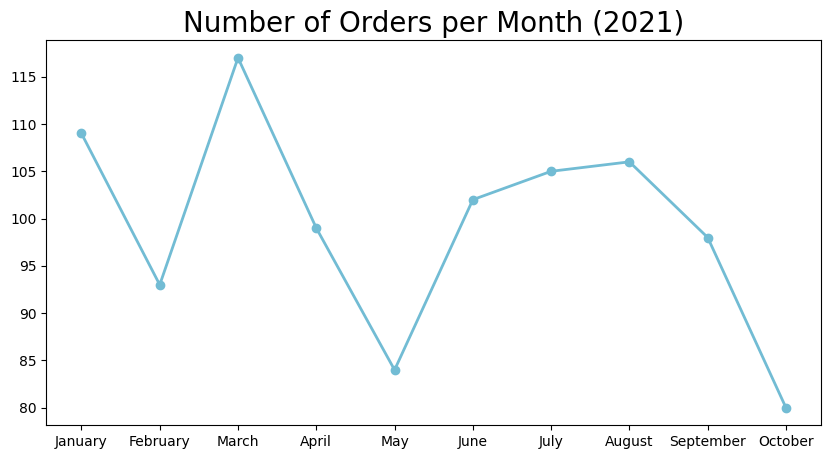

In [67]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df['order_date'], 
    monthly_orders_df['order_count'], 
    marker='o', 
    linewidth=2, 
    color='#72BCD4'
)
plt.title('Number of Orders per Month (2021)', loc='center', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insights:**
From the visualization above, we can observe that the **highest number of orders occurred in March**. However, there was a **significant decline in orders during February, April, May, and October**. This decline is likely to impact the company’s total revenue.

**Visualizing Total Revenue Per Month**

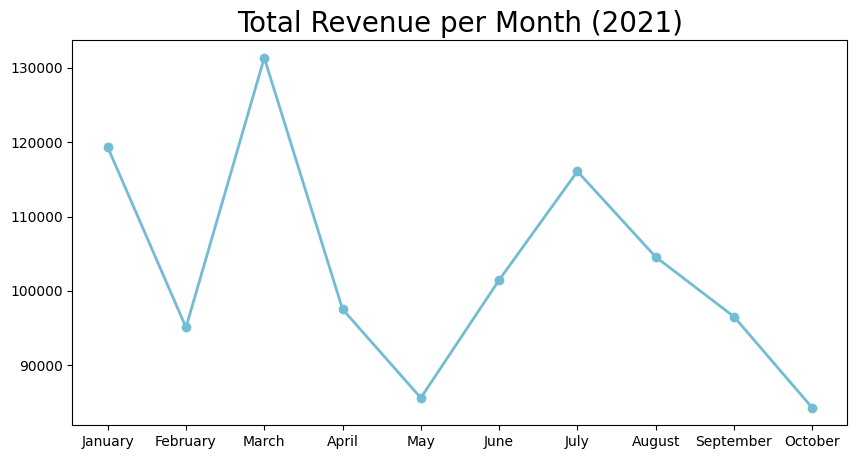

In [68]:
plt.figure(figsize=(10,5))
plt.plot(
    monthly_orders_df['order_date'],
    monthly_orders_df['revenue'],
    marker='o',
    linewidth=2,
    color='#72BCD4'
)
plt.title('Total Revenue per Month (2021)', loc='center', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insights:**
The **sharp decline in order volume during February, April, May, and October** has directly contributed to a **drop in revenue** during these months. Identifying the reasons behind these fluctuations can help in formulating strategies to boost sales during low-performing months.

#### 3.3.2 Which products are the best and worst sellers?

For this business question, we aim to identify the **best-selling and least-selling products**. To achieve this, we need to create a new DataFrame that captures the **total sales volume for each product**.

**Creating a DataFrame for Total Sales per Product**

In [69]:
sum_order_items_df = all_df.groupby('product_name').quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df

,product_name,quantity_x
0,Denim,527
1,Joggers,334
2,Pleated,308
3,Casual Slim Fit,306
4,Shearling,302
5,Relaxed Leg,301
6,Trench Coat,299
7,Puffer,298
8,Bomber,297
9,Chambray,290


**Visualizing the Best and Worst Performing Products**

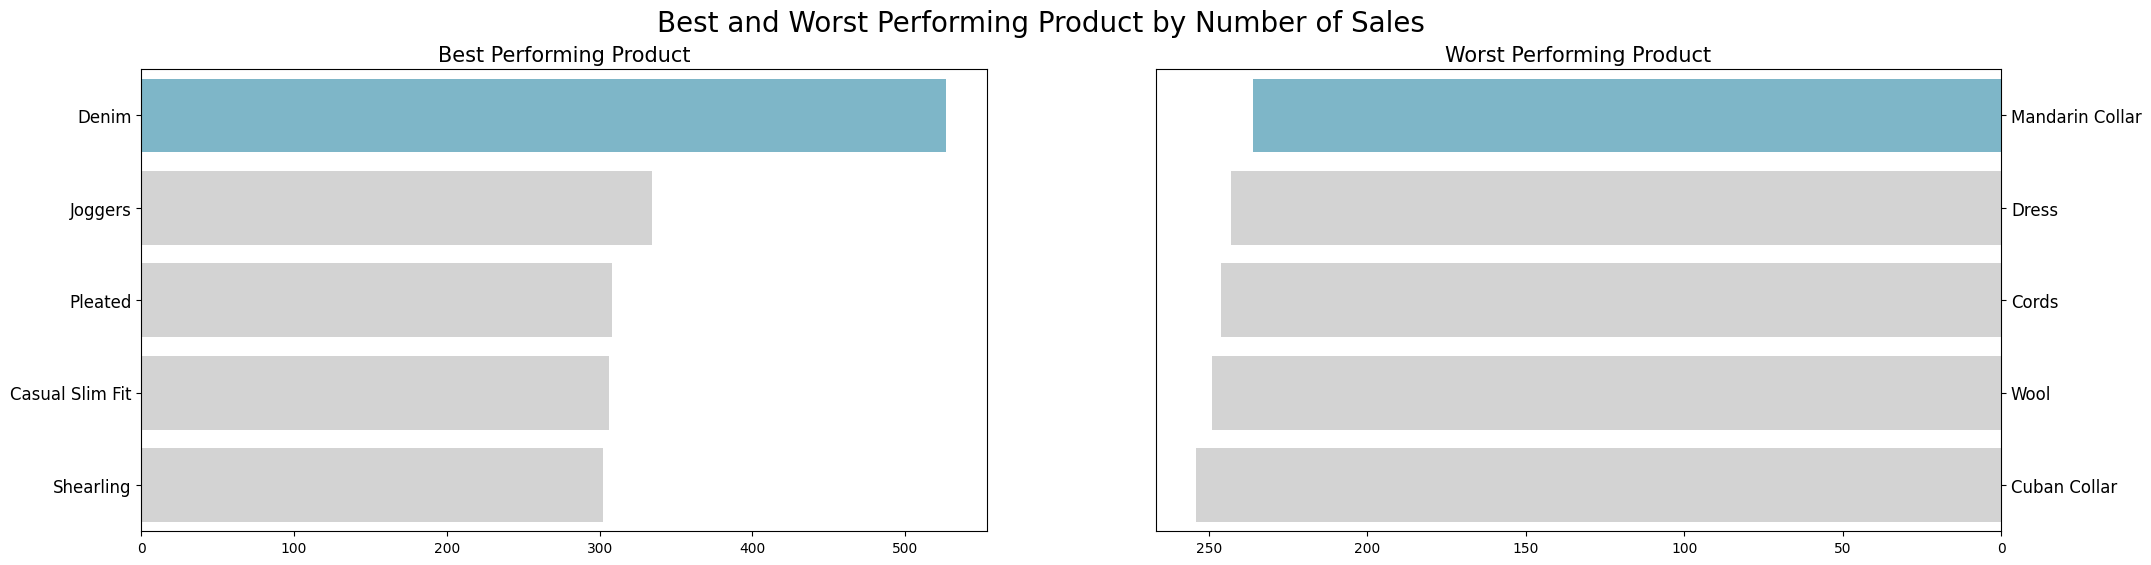

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ['#72BCD4', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']

# Best Performing Products
sns.barplot(x='quantity_x', y='product_name', data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Best Performing Product', loc='center', fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# Worst Performing Products
sns.barplot(x='quantity_x', y='product_name', data=sum_order_items_df.sort_values(by='quantity_x', ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_title('Worst Performing Product', loc='center', fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle('Best and Worst Performing Product by Number of Sales', fontsize=20)
plt.show()

**Insights from the Visualization:**
- **Denim** is the **best-selling product**, indicating high customer demand for this item.
- In contrast, **Mandarin Collar** is the **least-selling product**, suggesting it may require better marketing strategies, pricing adjustments, or design improvements to boost sales.

#### 3.3.3 What are the demographic characteristics of our customers?

The next business question we aim to answer is about the **demographics of our customers**. To do this, we will create a new DataFrame that captures the number of unique customers based on different demographic factors such as **gender, age group, and state**.

**3.3.3.1 Customer Demographics by Gender**

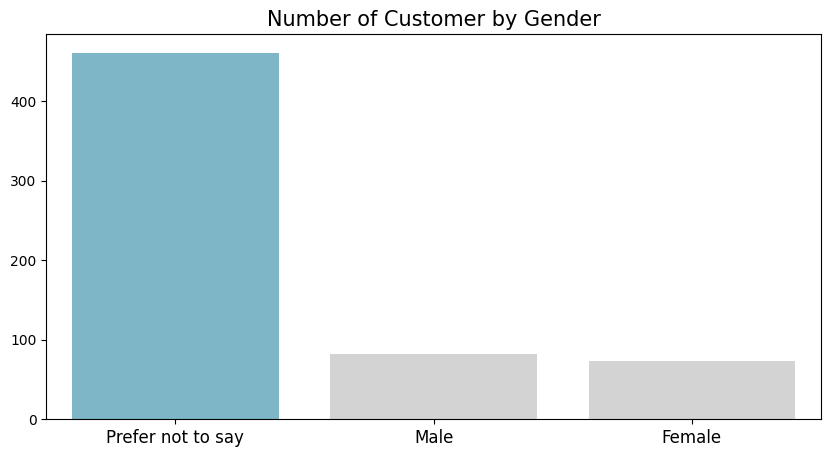

In [71]:
bygender_df = all_df.groupby(by='gender').customer_id.nunique().reset_index()
bygender_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y='customer_count',
    x='gender',
    data=bygender_df.sort_values(by='customer_count', ascending=False), palette=colors
)
plt.title('Number of Customer by Gender', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insights:**
- The majority of customers **chose not to disclose their gender**.
- This could indicate privacy concerns or a preference for anonymity when shopping.

**3.3.3.2 Customer Demographics by Age Group**

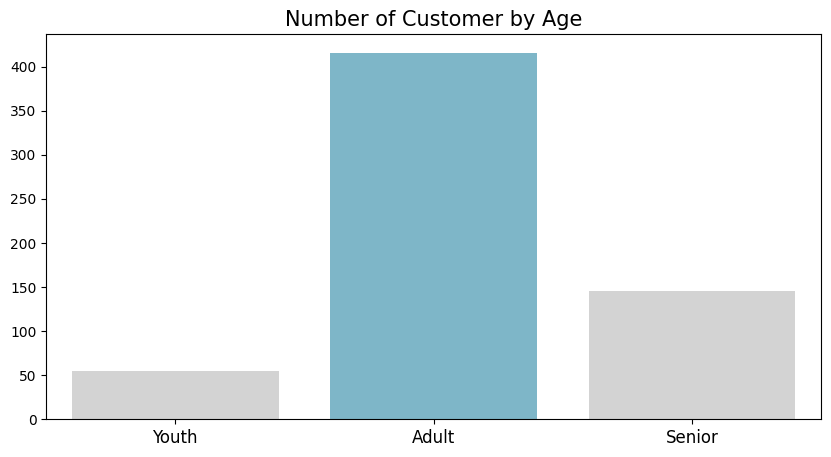

In [72]:
byage_df = all_df.groupby(by='age_group').customer_id.nunique().reset_index()
byage_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)

byage_df['age_group'] = pd.Categorical(byage_df['age_group'], ['Youth', 'Adult', 'Senior'])
plt.figure(figsize=(10, 5))
colors_ = ['#D3D3D3', '#72BCD4', '#D3D3D3', '#D3D3D3', '#D3D3D3']

sns.barplot(
    y='customer_count',
    x='age_group',
    data=byage_df.sort_values(by='age_group', ascending=False), palette=colors_
)
plt.title('Number of Customer by Age', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insights:**
- The **Adult age group dominates** the customer base.
- This suggests that the company's products appeal more to **adults rather than younger or senior customers**.

**3.3.3.3 Customer Demographics by State**

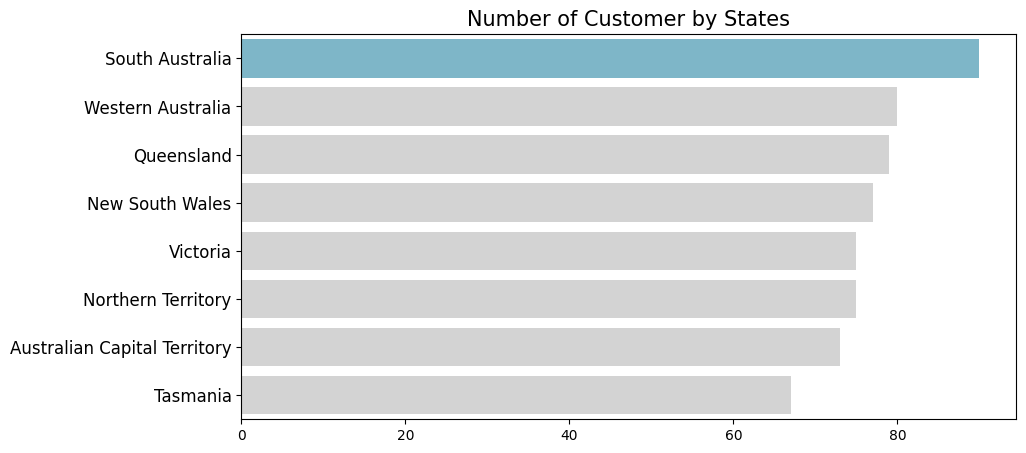

In [73]:
bystate_df = all_df.groupby(by='state').customer_id.nunique().reset_index()
bystate_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x='customer_count',
    y='state',
    data=bystate_df.sort_values(by='customer_count', ascending=False),
    palette=colors_
)
plt.title('Number of Customer by States', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insights:**
- The **highest number of customers** comes from **South Australia**.
- This indicates **stronger market penetration** in that region compared to other states.

#### 3.3.4 RFM Analysis

To answer the **last three business questions**, we can use an advanced analytical technique called **RFM Analysis**.
RFM (Recency, Frequency, and Monetary) analysis is a widely used method for **segmenting customers** based on their transaction behavior.

**The Three RFM Parameters:**
- **Recency**: Measures how recently a customer made their last purchase.
- **Frequency**: Identifies how often a customer makes purchases.
- **Monetary**: Determines the total revenue generated by a customer.

By analyzing these three factors, we can distinguish **high-value customers** (who purchase frequently and generate high revenue) from **low-value customers**.

**3.3.4.1 Implementing RFM Analysis**

First, we create a new DataFrame to store the RFM metrics for each customer.

In [74]:
rfm_df = all_df.groupby(by='customer_id', as_index=False).agg({
    'order_date': 'max', # Last order date
    'order_id': 'nunique', # Total number of unique orders (frequency)
    'total_price': 'sum' # Total revenue generated (monetary)
})

rfm_df.columns = ['customer_id', 'max_order_timestamp', 'frequency', 'monetary']

# Calculate recency (days since last transaction)
rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = orders_df['order_date'].dt.date.max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)

rfm_df.drop('max_order_timestamp', axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,1,3,1641,203
1,7,1,1017,156
2,10,1,270,229
3,11,1,382,149
4,12,1,1551,127


At this stage, we can **identify the best customers** based on **recency, frequency, and monetary value**.

**3.3.4.2 Identifying the Best Customers**

At this stage, we can **rank customers** based on their **Recency, Frequency, and Monetary** values:

In [75]:
# Customers with the most recent purchases (Recency)
rfm_df.sort_values('recency', ascending=True).head()

,customer_id,frequency,monetary,recency
426,690,3,3693,0
425,687,1,1122,0
241,401,4,3093,0
98,163,3,3494,1
250,415,2,2269,1


In [76]:
# Most frequent buyers (Frequency)
rfm_df.sort_values('frequency', ascending=False).head()

,customer_id,frequency,monetary,recency
350,571,6,6640,66
212,348,5,5119,24
409,664,5,6341,20
166,282,5,7632,63
346,566,5,5435,5


In [77]:
# Highest revenue-generating customers (Monetary)
rfm_df.sort_values('monetary', ascending=False).head()

,customer_id,frequency,monetary,recency
166,282,5,7632,63
350,571,6,6640,66
409,664,5,6341,20
422,683,3,5657,110
120,206,4,5581,66


**3.3.4.3 Visualizing the Best Customers**

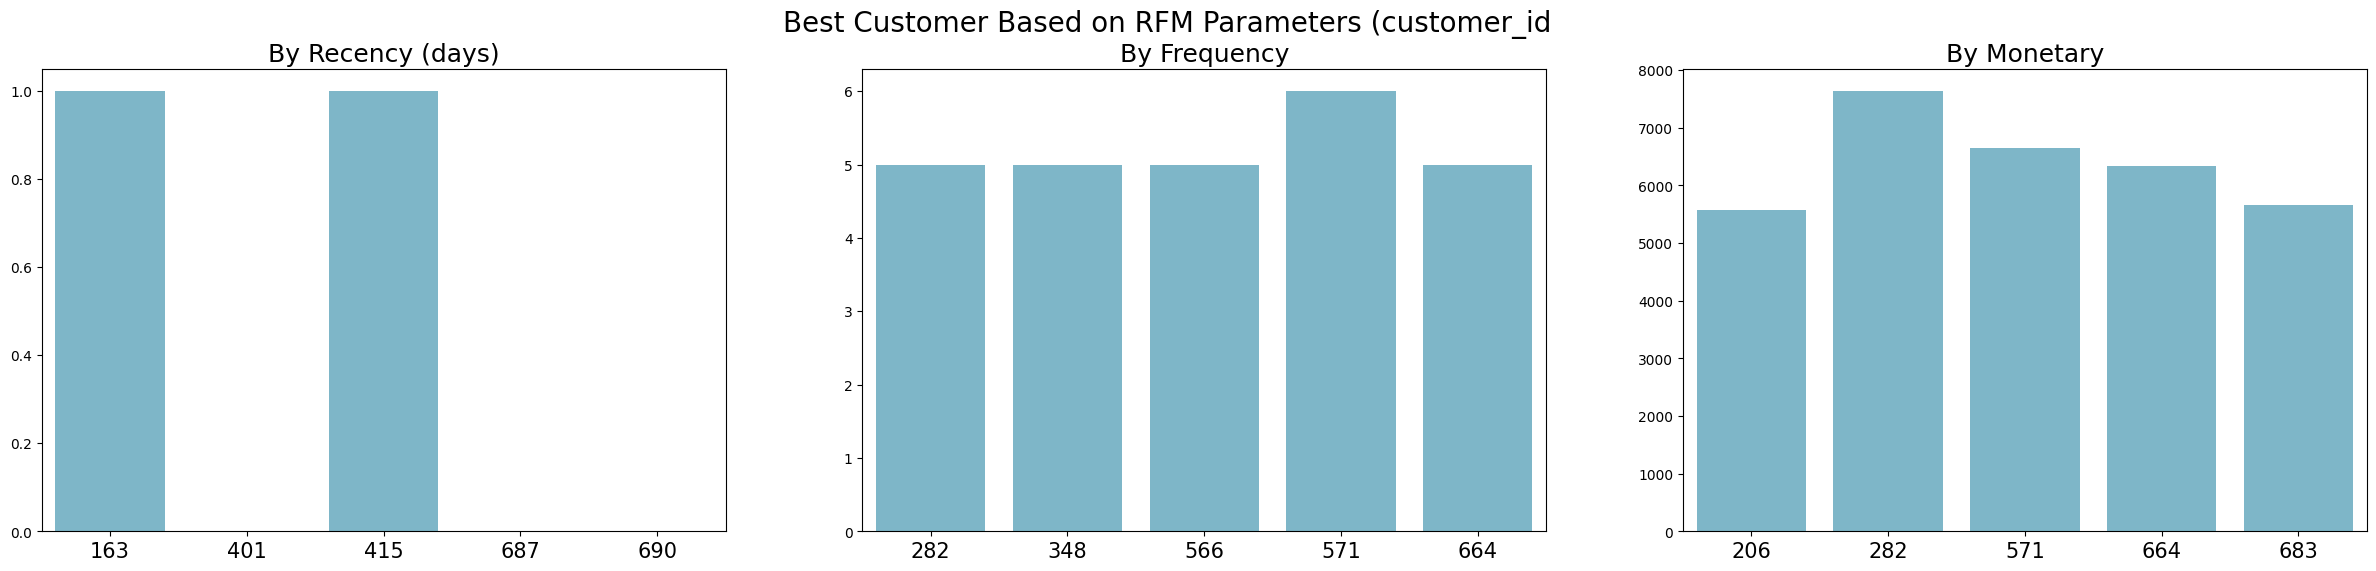

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Recency (Lower is better)
sns.barplot(y='recency', x='customer_id', data=rfm_df.sort_values(by='recency', ascending=True).head(), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('By Recency (days)', loc='center', fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Frequency (Higher is better)
sns.barplot(y='frequency', x='customer_id', data=rfm_df.sort_values(by='frequency', ascending=False).head(), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('By Frequency', loc='center', fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Monetary (Higher is better)
sns.barplot(y='monetary', x='customer_id', data=rfm_df.sort_values(by='monetary', ascending=False).head(), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('By Monetary', loc='center', fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle('Best Customer Based on RFM Parameters (customer_id', fontsize=20)
plt.show()

**Key Insights from RFM Analysis**
From the visualizations, we can identify our **top customers** based on:
- **Recency**: Customers who have recently made purchases.
- **Frequency**: Customers who buy frequently.
- **Monetary**: Customers who spend the most.

**3.3.4.4 Ranking Customers Based on Recency, Frequency & Monetary Score**

To better **prioritize and segment customers**, we will rank them based on **Recency, Frequency, and Monetary (RFM) scores**.

1. **Ranking Customers Based on RFM Metrics**
   
    We first **assign ranks** to each customer:
    - **Recency**: Ranked in **descending order** (more recent purchases get higher priority).
    - **Frequency & Monetary**: Ranked in **ascending order** (higher values get higher priority).

In [79]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,1,3,1641,203,133.0,560.0,351.0
1,7,1,1017,156,215.5,179.5,195.5
2,10,1,270,229,83.0,179.5,11.0
3,11,1,382,149,233.0,179.5,21.0
4,12,1,1551,127,267.5,179.5,330.0


2. **Normalizing Customer Ranks**
   
    To ensure that **each ranking score** is comparable across different metrics, we normalize them into a **0-100 scale**:

In [80]:
rfm_df['r_rank_norm'] = (rfm_df['r_rank'] / rfm_df['r_rank'].max()) * 100
rfm_df['f_rank_norm'] = (rfm_df['f_rank'] / rfm_df['f_rank'].max()) * 100
rfm_df['m_rank_norm'] = (rfm_df['m_rank'] / rfm_df['m_rank'].max()) * 100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,1,3,1641,203,21.626016,90.909091,56.980519
1,7,1,1017,156,35.040650,29.139610,31.737013
2,10,1,270,229,13.495935,29.139610,1.785714
3,11,1,382,149,37.886179,29.139610,3.409091
4,12,1,1551,127,43.495935,29.139610,53.571429


3. **Calculating the Final RFM Score**
   
    Now, we calculate a **weighted RFM score** to determine overall customer value:
    - **Recency = 15%**
    - **Frequency = 28%**
    - **Monetary = 57%**
    - The score is then scaled down by **multiplying by 0.05**

In [81]:
rfm_df['RFM_score'] = (
    0.15 * rfm_df['r_rank_norm'] +
    0.28 * rfm_df['f_rank_norm'] +
    0.57 * rfm_df['m_rank_norm']
) * 0.05

rfm_df = rfm_df.round(2)

rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,1,3.06
1,7,1.58
2,10,0.56
3,11,0.79
4,12,2.26
5,13,1.14
6,15,3.84


4. **Segmenting Customers Based on RFM Score**
   
    Based on the **RFM score**, we categorize customers into **five segments**:
    - **Top Customers** (RFM > 4.5)
    - **High-Value Customers** (4.0 < RFM ≤ 4.5)
    - **Medium-Value Customers** (3.0 < RFM ≤ 4.0)
    - **Low-Value Customers** (1.6 < RFM ≤ 3.0)
    - **Lost Customers** (RFM ≤ 1.6)

In [82]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", np.where(
        rfm_df['RFM_score'] > 4, "High value customer", np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, "Low value customers", "Lost customers"
            )
        )
    )
)

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,1,3.06,Medium value customer
1,7,1.58,Lost customers
2,10,0.56,Lost customers
3,11,0.79,Lost customers
4,12,2.26,Low value customers
5,13,1.14,Lost customers
6,15,3.84,Medium value customer
7,16,2.33,Low value customers
8,18,3.30,Medium value customer
9,19,1.68,Low value customers


5. **Customer Segmentation Summary**

    Now, let's count the number of customers in each segment:

In [83]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,50
1,Lost customers,190
2,Low value customers,204
3,Medium value customer,137
4,Top customers,35


6. **Visualizing Customer Segments**
   
    We sort and visualize the **distribution of customer segments** using a **bar chart**:

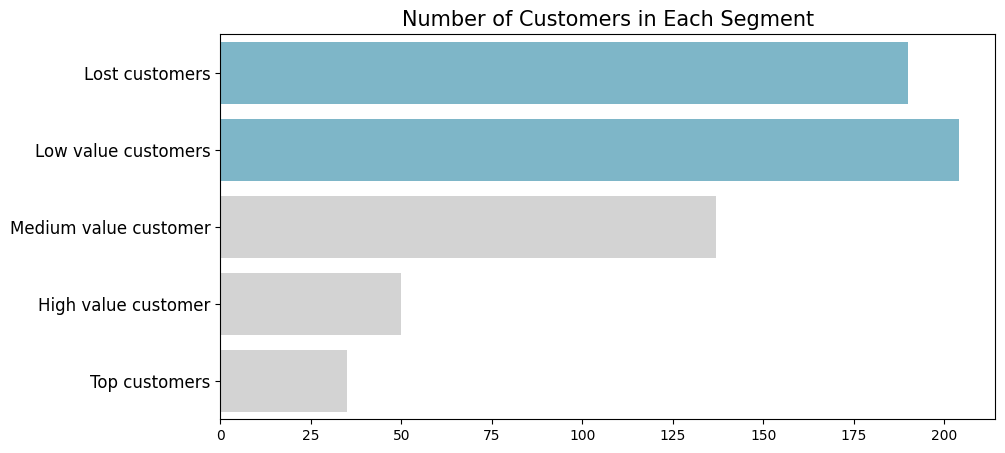

In [84]:
customer_segment_df['customer_segment'] = pd.Categorical(
    customer_segment_df['customer_segment'],
    ["Lost customers", "Low value customers", "Medium value customer",
     "High value customer", "Top customers"]
)

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)

plt.title("Number of Customers in Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

7. **Key Takeaways from RFM Segmentation**
   
    From the analysis, we can draw **valuable insights**:
    - **"Top Customers" and "High-Value Customers" (85 customers)** should be prioritized for **loyalty programs, exclusive offers, and VIP treatment** to retain them.
    - **"Medium-Value Customers" (137 customers)** can be encouraged to **increase spending** through **discounts and promotions**.
    - **"Low-Value Customers" (204 customers)** might be **occasional buyers**, so targeted campaigns may help increase engagement.
    - **"Lost Customers" (190 customers)** need a **reactivation strategy**, such as personalized emails or special discounts to bring them back.

## 4. Overall Summary & Recommendations

### 4.1 Customer Demographics Analysis

#### 4.1.1 Findings

- **Gender**: A large portion of customers did not disclose their gender, making it difficult to analyze gender-based trends accurately.
- **Age Group**: Most customers fall within the **Adult category**, indicating that this age group is the primary target audience.
- **State**: The majority of customers are from **South Australia**, making it the region with the highest customer engagement.
  
#### 4.1.2 Recommendations

✅ **Encourage Gender Disclosure**
- Offer incentives (discounts, loyalty points) to customers who complete their profile, helping improve data accuracy for targeted marketing.

✅ **Target Adult Demographics**
- Focus on marketing strategies tailored to adults (e.g., personalized promotions, relevant product recommendations).

✅ **Expand Beyond South Australia**
- Investigate why South Australia has the highest customers and explore opportunities in other states with lower engagement.

### 4.2 RFM Analysis & Customer Segmentation

#### 4.2.1 Findings
- **Recency, Frequency, Monetary (RFM) Segmentation** identified **five key customer segments**:
    - **Top Customers** (High RFM Score) – 35 customers
    - **High-Value Customers** – 50 customers
    - **Medium-Value Customers** – 137 customers
    - **Low-Value Customers** – 204 customers
    - **Lost Customers** (Low RFM Score) – 190 customers
- **Monetary Score (Spending Amount) had the highest weight (57%)**, indicating that revenue generation is a key focus.

#### 4.2.2 Recommendations
✅ **Engage "Top" and "High-Value Customers"**
- Provide **exclusive offers, early access to sales, and VIP treatment** to retain these high-spending customers.

✅ **Increase Retention for Medium-Value Customers**
- Implement a **loyalty program** encouraging repeat purchases (e.g., discounts after multiple purchases).

✅ **Reactivate "Lost Customers"**
- Launch a **win-back campaign** with targeted emails offering **personalized discounts or re-engagement incentives**.
- Analyze why they stopped purchasing (pricing, product relevance, competition).

✅ **Improve Low-Value Customer Engagement**
- Offer **bundled deals** or **subscription-based models** to encourage more frequent purchases.

### 4.3 Business Strategy Based on Insights

#### 4.3.1 Key Takeaways
✔ **Revenue is driven by a small group of high-value customers**, so **retention strategies** should be a priority.

✔ **Adult customers dominate the market**, suggesting that products, promotions, and messaging should cater to their preferences.

✔ **Customer drop-off needs attention**—with nearly 190 "Lost Customers," retention efforts should focus on preventing churn.

#### 4.3.2 Strategic Recommendations
🔹 **Personalized Marketing & Customer Segmentation**
- Use **RFM segmentation to create personalized offers** for each group.
- High-value customers → VIP benefits 🎖
- Medium-value customers → Exclusive discounts 💰
- Lost customers → Win-back incentives 📩

🔹 **Expand Regional Reach**
- Since South Australia has the most customers, analyze **market potential in other states** and expand targeted marketing campaigns.

🔹 **Enhance Customer Experience**
- Simplify checkout, improve website UX, and provide **better customer support** to increase retention.

🔹 **Experiment with Pricing & Promotions**
- Offer **seasonal discounts, limited-time bundles**, and **loyalty rewards** to boost engagement.

### 4.4 Final Thoughts

This analysis **provides a solid foundation** for understanding customer behavior and improving customer engagement strategies. By focusing on **high-value retention, targeted marketing, and reactivating lost customers**, the business can maximize revenue and sustain long-term growth. 🚀